In [2]:
import pandas as pd
import numpy as np
# from google.colab import drive

In [3]:
# drive.mount('/content/drive')

In [4]:
# give path to the data.csv 
file_path = 'data.csv' 

As one may see, the csv file contains actual labels and the predicted probabilities from two ML model (random forest and logistic regression).

In [5]:
df = pd.read_csv(file_path)
df.head()


,y_act,y_pred_random_forest,y_pred_logistic
0,1,0.639816,0.531904
1,0,0.490993,0.414496
2,1,0.623815,0.569883
3,1,0.506616,0.443674
4,0,0.418302,0.369532


You have to take a threshold value and will have to predict final label. 
So add two new columns named as 'y_pred_rf'and 'y_pred_lr' in the df dataframe. These new columns will have final label predicted by the two models based on the threshold set.

In [6]:
thresh = 0.5
df['y_pred_rf'] = (df.y_pred_random_forest >= 0.5).astype('int')
df['y_pred_lr'] = (df.y_pred_logistic >= 0.5).astype('int')
df.head()

,y_act,y_pred_random_forest,y_pred_logistic,y_pred_rf,y_pred_lr
0,1,0.639816,0.531904,1,1
1,0,0.490993,0.414496,0,0
2,1,0.623815,0.569883,1,1
3,1,0.506616,0.443674,1,0
4,0,0.418302,0.369532,0,0


In [7]:
df.shape

(15758, 5)

Complete below function to compute true positive (tp), tn, fn, tn

In [8]:
def compute_tp_tn_fn_fp(y_act, y_pred):
	'''
	Write code below
	'''
	tp=0
	tn=0
	fp=0
	fn=0
	for i in range(len(y_pred)):
		if y_act[i]==y_pred[i]:
			if y_act[i]==1:
				tp+=1
			elif y_act[i]==0:
				tn+=1
		else:
			if y_act[i]==1:
				fn+=1
			else:
				fp+=1


	return tp, tn, fp, fn

In [9]:
tp_lr, tn_lr, fp_lr, fn_lr = compute_tp_tn_fn_fp(df.y_act, df.y_pred_lr)
print('TP for Logistic Reg :', tp_lr)
print('TN for Logistic Reg :', tn_lr)
print('FP for Logistic Reg :', fp_lr)
print('FN for Logistic Reg :', fn_lr)

TP for Logistic Reg : 4279
TN for Logistic Reg : 5425
FP for Logistic Reg : 2454
FN for Logistic Reg : 3600


In [10]:
tp_rf, tn_rf, fp_rf, fn_rf = compute_tp_tn_fn_fp(df.y_act, df.y_pred_rf)
print('TP for Random Forest :', tp_rf)
print('TN for Random Forest :', tn_rf)
print('FP for Random Forest :', fp_rf)
print('FN for Random Forest :', fn_rf)

TP for Random Forest : 5047
TN for Random Forest : 5519
FP for Random Forest : 2360
FN for Random Forest : 2832


Let's verify result from sklearn

In [11]:
from sklearn.metrics import confusion_matrix
tn_rf1, fp_rf1, fn_rf1, tp_rf1 = confusion_matrix(df.y_act, df.y_pred_rf).ravel()

In [12]:
print('TP for Random Forest :', tp_rf1)
print('TN for Random Forest :', tn_rf1)
print('FP for Random Forest :', fp_rf1)
print('FN for Random Forest :', fn_rf1)

TP for Random Forest : 5047
TN for Random Forest : 5519
FP for Random Forest : 2360
FN for Random Forest : 2832


In a similar way complete all the functions below

In [13]:
def compute_accuracy(tp, tn, fn, fp):
	'''
	write your code below

	'''
	acc= 100*(tp+tn)/(tp+tn+fp+fn) #in percentage 
	return acc

In [14]:
print('Accuracy for Logistic Regression :', compute_accuracy(tp_lr, tn_lr, fn_lr, fp_lr))
print('Accuracy for Random Forest :', compute_accuracy(tp_rf, tn_rf, fn_rf, fp_rf))

Accuracy for Logistic Regression : 61.58141896179718
Accuracy for Random Forest : 67.05165630156111


In [15]:
from sklearn.metrics import accuracy_score

In [16]:
print('Accuracy for Logistic Regression :', 100* accuracy_score(df.y_act, 
                                                           df.y_pred_lr))
print('Accuracy for Random Forest :', 100*accuracy_score(df.y_act, 
                                                           df.y_pred_rf))

Accuracy for Logistic Regression : 61.58141896179718
Accuracy for Random Forest : 67.05165630156111


In [17]:
def compute_precision(tp,fp):
	'''
	complete function, give suitable input arguments too

	'''
	pre=100*tp/(tp+fp)
	return pre

In [18]:
print('Precision for Logistic Regression :', compute_precision(tp_lr,fp_lr))
print('Precision for Random Forest :', compute_precision(tp_rf,fp_rf))

Precision for Logistic Regression : 63.55265112134264
Precision for Random Forest : 68.1382476036182


In [19]:
from sklearn.metrics import precision_score
print('Precision for Logistic Regression :', 100* precision_score(df.y_act, 
                                                           df.y_pred_lr))
print('Precision for Random Forest :', 100* precision_score(df.y_act, 
                                                           df.y_pred_rf))

Precision for Logistic Regression : 63.55265112134264
Precision for Random Forest : 68.1382476036182


In [20]:
def compute_recall(tp,fn):
	'''
  complete function, give suitable input arguments too
	 
	'''
	rec=100*tp/(tp+fn)
	return rec

In [21]:
print('Recall for Logistic Regression :', compute_recall(tp_lr,fn_lr))
print('Recall for Random Forest :', compute_recall(tp_rf,fn_rf))

Recall for Logistic Regression : 54.30892245208783
Recall for Random Forest : 64.05635232897576


In [22]:
from sklearn.metrics import recall_score

print('Recall for Logistic Regression :', 100* recall_score(df.y_act, 
                                                           df.y_pred_lr))
print('Recall for Random Forest :', 100* recall_score(df.y_act, 
                                                           df.y_pred_rf))

Recall for Logistic Regression : 54.30892245208783
Recall for Random Forest : 64.05635232897576


In [23]:
def compute_f1_score(y_true, y_pred):
    # calculates the F1 score. Complete function
    tp1,tn1,fp1,fn1=compute_tp_tn_fn_fp(y_true,y_pred)
    # pre=compute_precision(tp1,fp1)
    # rec=compute_recall(tp1,fn1)
    # f1_score=(2*pre*rec)/(pre+rec)
    f1_score=tp1/(tp1+ 0.5*(fp1+fn1)) 
    
    return f1_score

In [24]:
print('F1 score for Logistic Regression :', compute_f1_score(df.y_act, 
                                                             df.y_pred_lr))
print('F1 score for Random Forest :', compute_f1_score(df.y_act, 
                                                             df.y_pred_rf))

F1 score for Logistic Regression : 0.5856830002737476
F1 score for Random Forest : 0.660342797330891


In [25]:
from sklearn.metrics import f1_score
print('F1 score for Logistic Regression :', f1_score(df.y_act, df.y_pred_lr))
print('F1 score for Random Forest :', f1_score(df.y_act, df.y_pred_rf))

F1 score for Logistic Regression : 0.5856830002737475
F1 score for Random Forest : 0.660342797330891


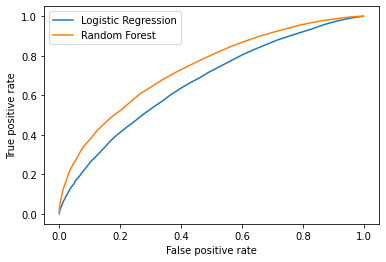

In [28]:
import matplotlib.pyplot as plt
tpr1=[]
fpr1=[]
tpr2=[]
fpr2=[]
for i in np.arange(0.1,0.99,0.01):
    df['y_pred_rf'] = (df.y_pred_random_forest >= i).astype('int')
    df['y_pred_lr'] = (df.y_pred_logistic >= i).astype('int')
    tp1,tn1,fp1,fn1=compute_tp_tn_fn_fp(df.y_act,df.y_pred_lr)
    tp2,tn2,fp2,fn2=compute_tp_tn_fn_fp(df.y_act,df.y_pred_rf)
    tpr1.append(tp1/(tp1+fn1))
    tpr2.append(tp2/(tp2+fn2))
    fpr1.append(fp1/(fp1+tn1))
    fpr2.append(fp2/(fp2+tn2))
plt.plot(fpr1,tpr1,label="Logistic Regression")
plt.plot(fpr2,tpr2,label="Random Forest")
plt.xlabel("False positive rate")
plt.ylabel("True positive rate")
plt.legend()
plt.show()


#So Random forest gives better estimation as shown in the curve

